<a href="https://colab.research.google.com/github/mrigakshipandey/Personal/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **B Tech Final Year Major Project**

Sequence prediction of RNGs



In [0]:
#Install dependency Libraries
!pip install tensorflow #LSTM implementation
!pip install numpy #matrix manipulation
!pip install pandas #data structure
!pip install matplotlib #visualiation
!pip install scikit-learn #Scaling

#import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import io
import random
%matplotlib inline

In [0]:
#Write random data to a file
file = open("Random.csv", "w" )
file.write("num\n")
for i in range(10000000):
  line = random.randint(0, 1)
  file.write(str(line)+"\n")
file.close()

In [0]:
#Read the csv
file=pd.read_csv('Random.csv')
file.head()

,num
0,0
1,1
2,0
3,1
4,0


In [0]:
#get data
data_to_use=file['num'].values
data_to_use

array([0, 1, 0, ..., 0, 0, 1])

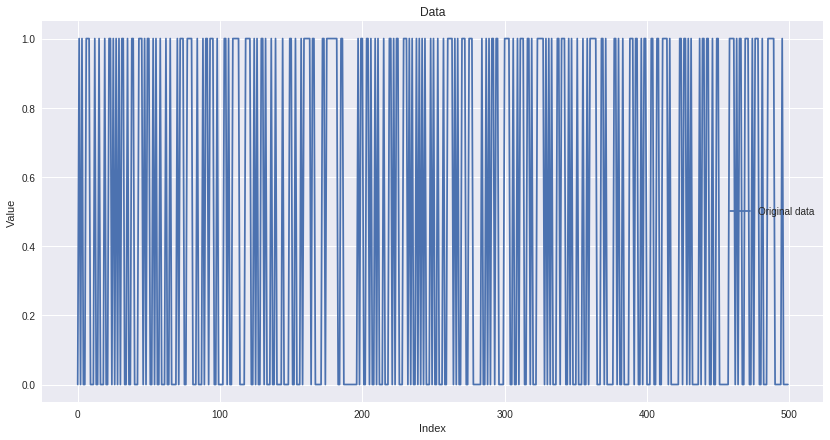

In [0]:
#we now plot the data
plt.figure(figsize=(14, 7))
plt.title('Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.plot(data_to_use[0:500], label='Original data')
plt.legend()
plt.show()

In [0]:
def window_data(data, window_size):
  X=[]
  y=[]
  
  i=0
  while(i+window_size)<=len(data)-1:
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
    
    i+=1
  assert len(X)==len(y)
  return X,y

data_to_use1=data_to_use.reshape(-1,1) 
x,y=window_data(data_to_use1,32)

In [33]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
y1 = y1.reshape(len(y), 1)
y1 = onehot_encoder.fit_transform(y1)
print(y1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [34]:
#Seggragating testing and training dataset
import math
p=math.ceil(0.9*len(x))

x_train=np.array(x[:p])
y_train=np.array(y1[:p])

x_test=np.array(x[p:])
y_test=np.array(y1[p:])

print("X_train size : {}".format(x_train.shape))
print("y_train size : {}".format(y_train.shape))
print("X_test size : {}".format(x_test.shape))
print("y_test size : {}".format(y_test.shape))

X_train size : (8999972, 32, 1)
y_train size : (8999972, 2)
X_test size : (999996, 32, 1)
y_test size : (999996, 2)


In [38]:
#MLP
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Embedding
from keras.layers import LSTM
from keras import metrics

model = Sequential()
model.add(Flatten(input_shape=(32,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.fit(x=x_train, y=y_train, batch_size=1000, epochs=25, verbose=2, callbacks=None, validation_data=(x_test,y_test), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
score=model.evaluate(x=x_test, y=y_test, batch_size=3200, verbose=1, sample_weight=None, steps=None)

print("Test accuracy", score[1]*100,"%")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 13)                429       
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 12        
Total params: 1,567
Trainable params: 1,567
Non-trainable params: 0
_________________________________________________________________
Train on 8999972 samples, validate on 999996 samples
Epoch 1/25
 - 32s - loss: 0.2500 - acc: 0.5000 - val_loss: 0.2500 - val_acc: 0.4999
Epo